In [5]:
import requests
from pandas.io.json import json_normalize
URL = "https://api.covid19india.org/data.json"
data = requests.get(url=URL).json()
covid19_df = json_normalize(data['statewise'])

SUMMARIES OF DATA

In [7]:
df_morph = covid19_df[["state","statecode","active","confirmed","deaths"]].drop_duplicates()
df_morph

,state,statecode,active,confirmed,deaths
0,Total,TT,13923,17340,559
1,Maharashtra,MH,3470,4200,223
2,Delhi,DL,1668,2003,45
3,Gujarat,GJ,1575,1743,63
4,Rajasthan,RJ,1250,1478,23
5,Tamil Nadu,TN,1051,1477,15
6,Madhya Pradesh,MP,1204,1407,72
7,Uttar Pradesh,UP,956,1100,17
8,Telangana,TG,651,858,21
9,Andhra Pradesh,AP,565,647,17


Data file Converting json to excel

In [15]:
import csv, json
import pandas as pd
import numpy  as np
import matplotlib.pyplot as pt
import requests
file=pd.read_excel('D:\\covidexcel.xlsx')
file.fillna("undefined", inplace = True)
json_file = open('D:\\raw_data.json','w')
url = requests.get('https://api.covid19india.org/raw_data.json')
json_file.write(str(url.text))
json_file.close()

#to load json file into variable
data = json.load(open('D:\\raw_data.json'))


#writing into cvs file
output = csv.writer(open('D:\\covidcsv.csv','w'))
output.writerow(data['raw_data'][0].keys())
for row in data['raw_data']:
    output.writerow(row.values())
    
#converting cvs file to excel
read_file = pd.read_csv (r'D:\\covidcsv.csv',encoding="cp1252")
read_file.to_excel (r'D:\\covidexcel.xlsx', index = None, header=True)

Line graph of gender represented

-----> male : 2523
-----> female : 1223
-----> undefined : 13566


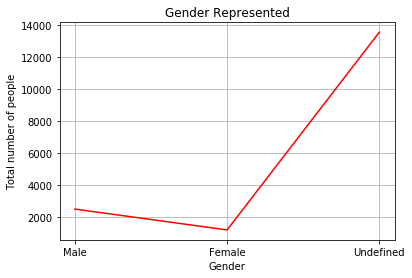

In [22]:
f=0
m=0
ud=0
for i in file['gender']:
    if(i=='M'):m=m+1
    elif(i=='F'):f=f+1
    else:ud=ud+1
print("-----> male :",m)
print("-----> female :",f)
print("-----> undefined :",ud)

gender=["Male","Female","Undefined"]
value=[m,f,ud]
pt.title("Gender Represented")
pt.xlabel("Gender")
pt.ylabel("Total number of people")
pt.plot(gender,value,color='red')
pt.grid(True)
pt.show()

Pie Chart for Death,Deltadeaths,Recoverd & TotalRecovered

([<matplotlib.patches.Wedge at 0x1b01e62c048>,
 [Text(-0.638780780605071, 1.1322363332491923, 'Death'),
  Text(-1.198948910439037, 0.7228564934736675, 'Deltadeaths'),
  Text(0.5369880539800044, -0.9600228277925312, 'Recoverd'),
  Text(0.005044981632652199, 1.0999884309211285, 'TotalRecovered')],
 [Text(-0.393095864987736, 0.6967608204610415, '16.4%'),
  Text(-0.7707528709965237, 0.46469346009021484, '0.0%'),
  Text(0.29290257489818416, -0.5236488151595624, '83.5%'),
  Text(0.002751808163264836, 0.5999936895933428, '0.1%')])

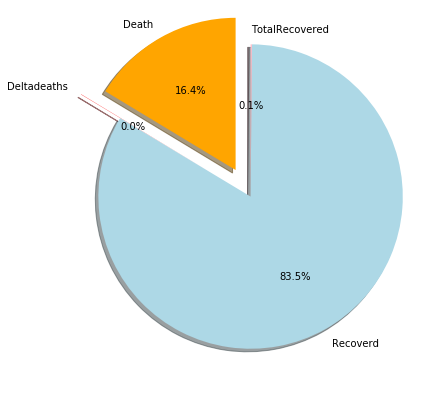

In [23]:
active=covid19_df['active'][0]
confirmed=covid19_df['confirmed'][0]
deltaconfirmed=covid19_df['deltaconfirmed'][0]
deaths=covid19_df['deaths'][0]
deltadeaths=covid19_df['deltadeaths'][0]
recovered=covid19_df['recovered'][0]
deltarecovered=covid19_df['deltarecovered'][0]
labels=['Death','Deltadeaths','Recoverd','TotalRecovered']
sizes=[deaths,deltadeaths,recovered,deltarecovered]
explode=[0.2,0.3,0,0]
colors = ['orange','red','lightblue','pink']
pt.figure(figsize = (10, 7))
pt.pie(sizes,labels=labels,colors=colors,shadow='true',autopct='%1.1f%%',explode=explode,startangle=90)

State affected by percentage

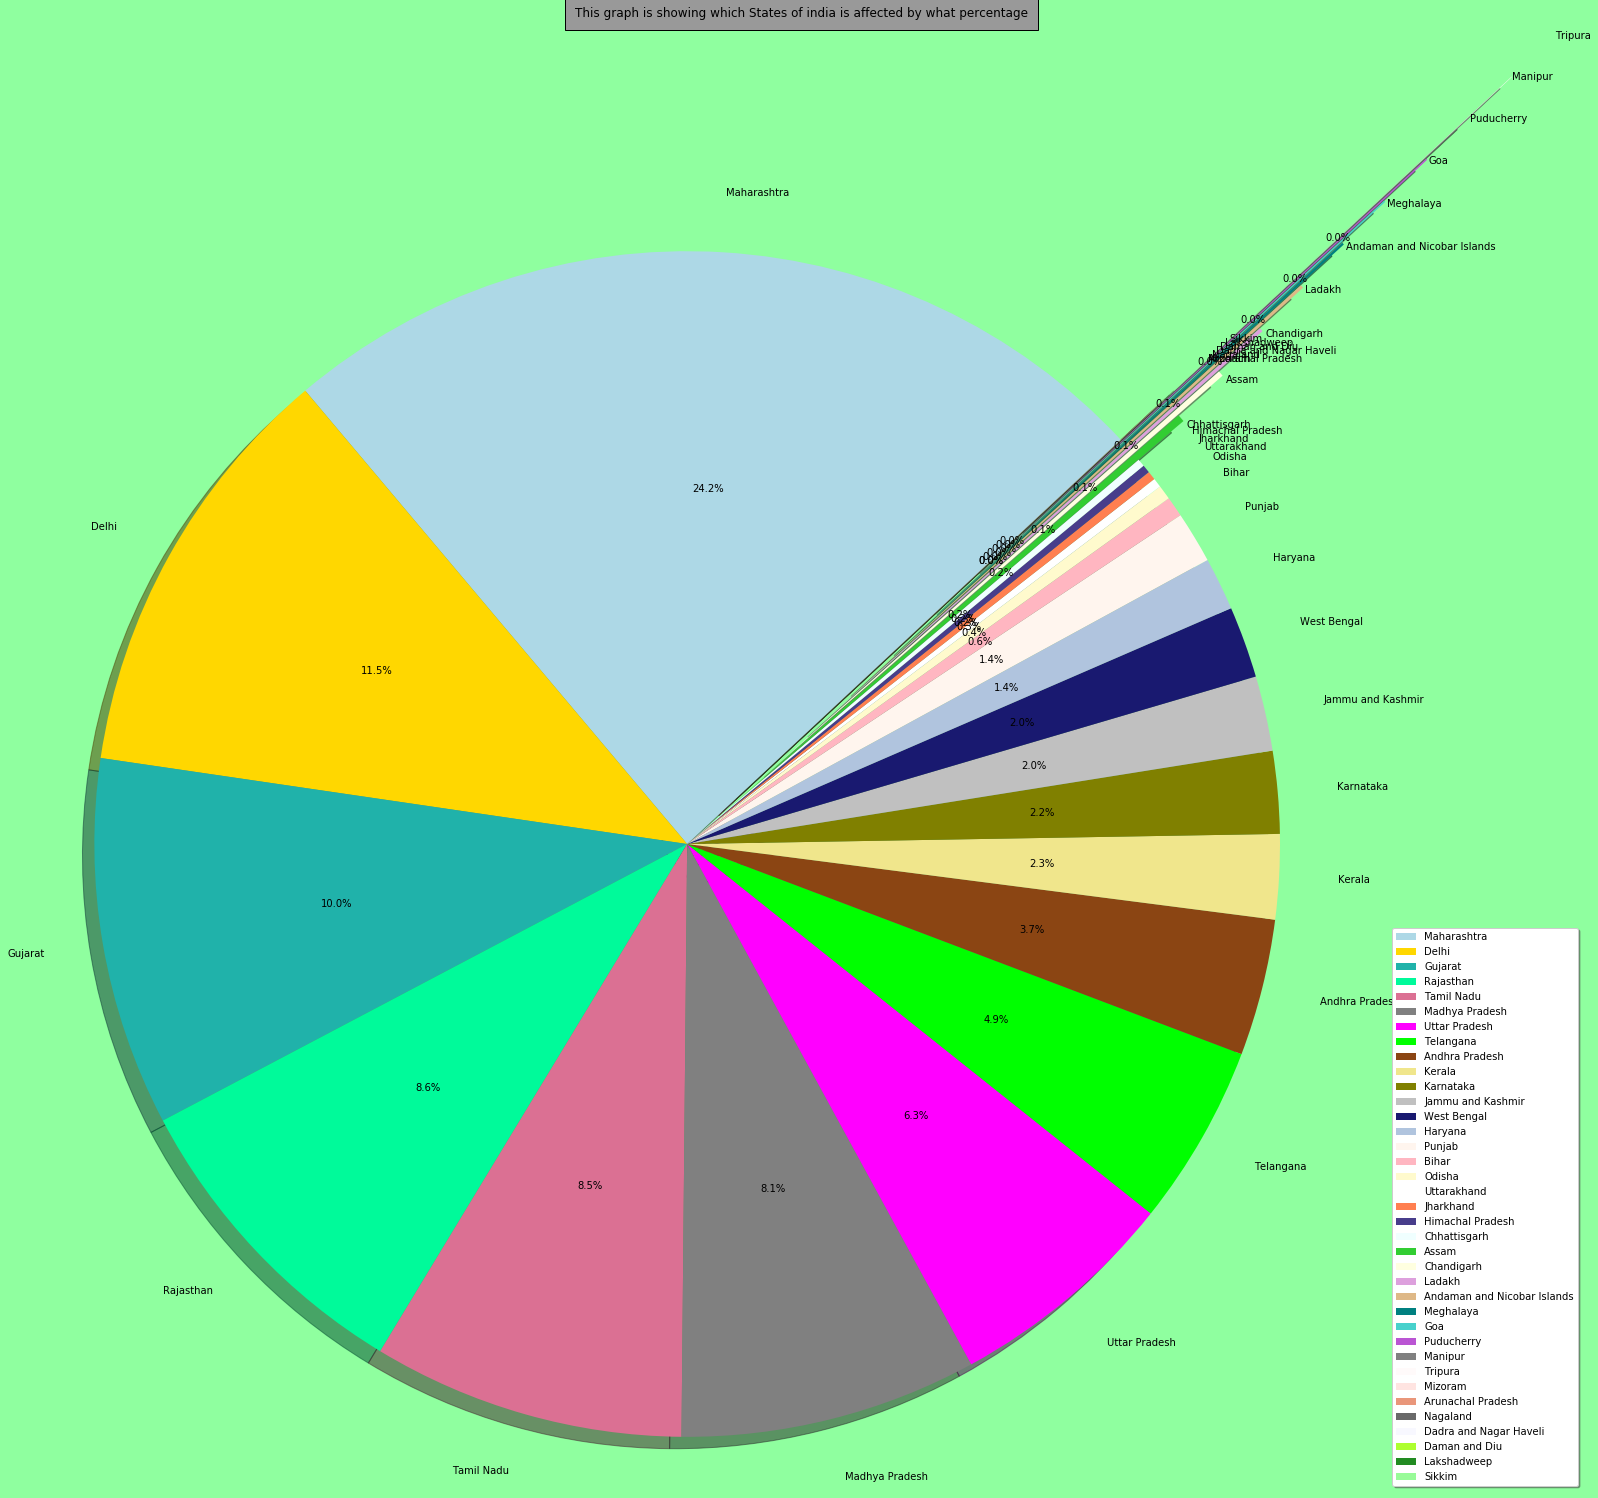

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,recovered,state,statecode,statenotes
33,0,0,0,0,0,0,20/04/2020 08:45:07,0,Nagaland,NL,
34,0,0,0,0,0,0,17/04/2020 15:03:07,0,Dadra and Nagar Haveli,DN,
35,0,0,0,0,0,0,26/03/2020 07:19:29,0,Daman and Diu,DD,
36,0,0,0,0,0,0,26/03/2020 07:19:29,0,Lakshadweep,LD,
37,0,0,0,0,0,0,26/03/2020 07:19:29,0,Sikkim,SK,


In [26]:
import matplotlib.colors as pltc
import matplotlib.pyplot as plt
from random import sample
import requests
from pandas.io.json import json_normalize
URL = "https://api.covid19india.org/data.json"
data = requests.get(url=URL).json()
covid19_df = json_normalize(data['statewise'])
T='This graph is showing which States of india is affected by what percentage'
explode = (0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1,0.10,0.11,0.12,0.13,0.14,0.15)
labels=covid19_df['state'][covid19_df["state"]!='Total']

all_colors = [ k for k,v in pltc.cnames.items() ]
    

for val in range(2):
    colors = sample(all_colors, len(labels))
fig = plt.figure(figsize=(28,27))
fig.patch.set_facecolor('xkcd:mint green')
size=covid19_df['confirmed'][covid19_df["state"]!='Total']
plt.pie(size,explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',shadow=True,startangle=43)
plt.legend(labels, loc="best",shadow=True)
plt.axis('equal')
plt.title(T,bbox={'facecolor':'0.6', 'pad':10})
plt.show()
covid19_df.tail()

Line Plot - Deaths and Recovered Statewise

MH  =  Maharashtra
DL  =  Delhi
GJ  =  Gujarat
RJ  =  Rajasthan
TN  =  Tamil Nadu
MP  =  Madhya Pradesh
UP  =  Uttar Pradesh
TG  =  Telangana
AP  =  Andhra Pradesh
KL  =  Kerala
KA  =  Karnataka
JK  =  Jammu and Kashmir
WB  =  West Bengal
HR  =  Haryana
PB  =  Punjab
BR  =  Bihar
OR  =  Odisha
UT  =  Uttarakhand
JH  =  Jharkhand
HP  =  Himachal Pradesh
CT  =  Chhattisgarh
AS  =  Assam
CH  =  Chandigarh
LA  =  Ladakh
AN  =  Andaman and Nicobar Islands
ML  =  Meghalaya
GA  =  Goa
PY  =  Puducherry
MN  =  Manipur
TR  =  Tripura
MZ  =  Mizoram
AR  =  Arunachal Pradesh
NL  =  Nagaland
DN  =  Dadra and Nagar Haveli
DD  =  Daman and Diu
LD  =  Lakshadweep
SK  =  Sikkim


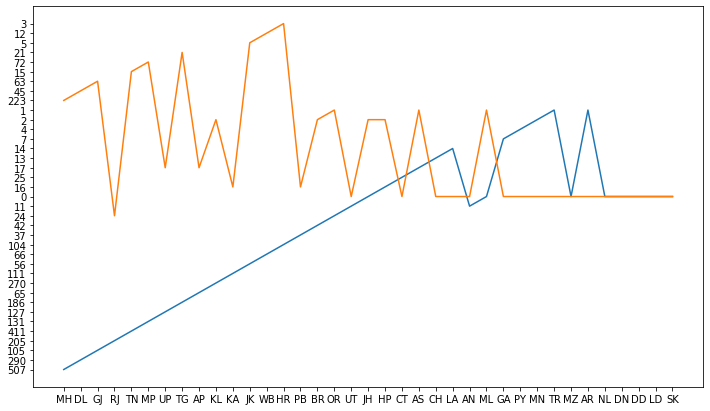

In [32]:
import matplotlib.pyplot as plt 
import requests
from pandas.io.json import json_normalize
URL = "https://api.covid19india.org/data.json"
data = requests.get(url=URL).json()
covid19_df = json_normalize(data['statewise']) 
covid19_dfnew=covid19_df.drop(covid19_df.index[[0]])
plt.figure(figsize = (12, 7))
statecode=covid19_dfnew['statecode']
recovered=covid19_dfnew['recovered']
deaths=covid19_dfnew['deaths']
plt.plot(statecode, recovered, label='covid-19')
plt.plot(statecode, deaths, label='covid-19')
import itertools 
for (a,b) in zip(covid19_dfnew['statecode'], covid19_dfnew['state']):
    print(a , ' = ' , b)

How this virus spread day by day start from day one to till date

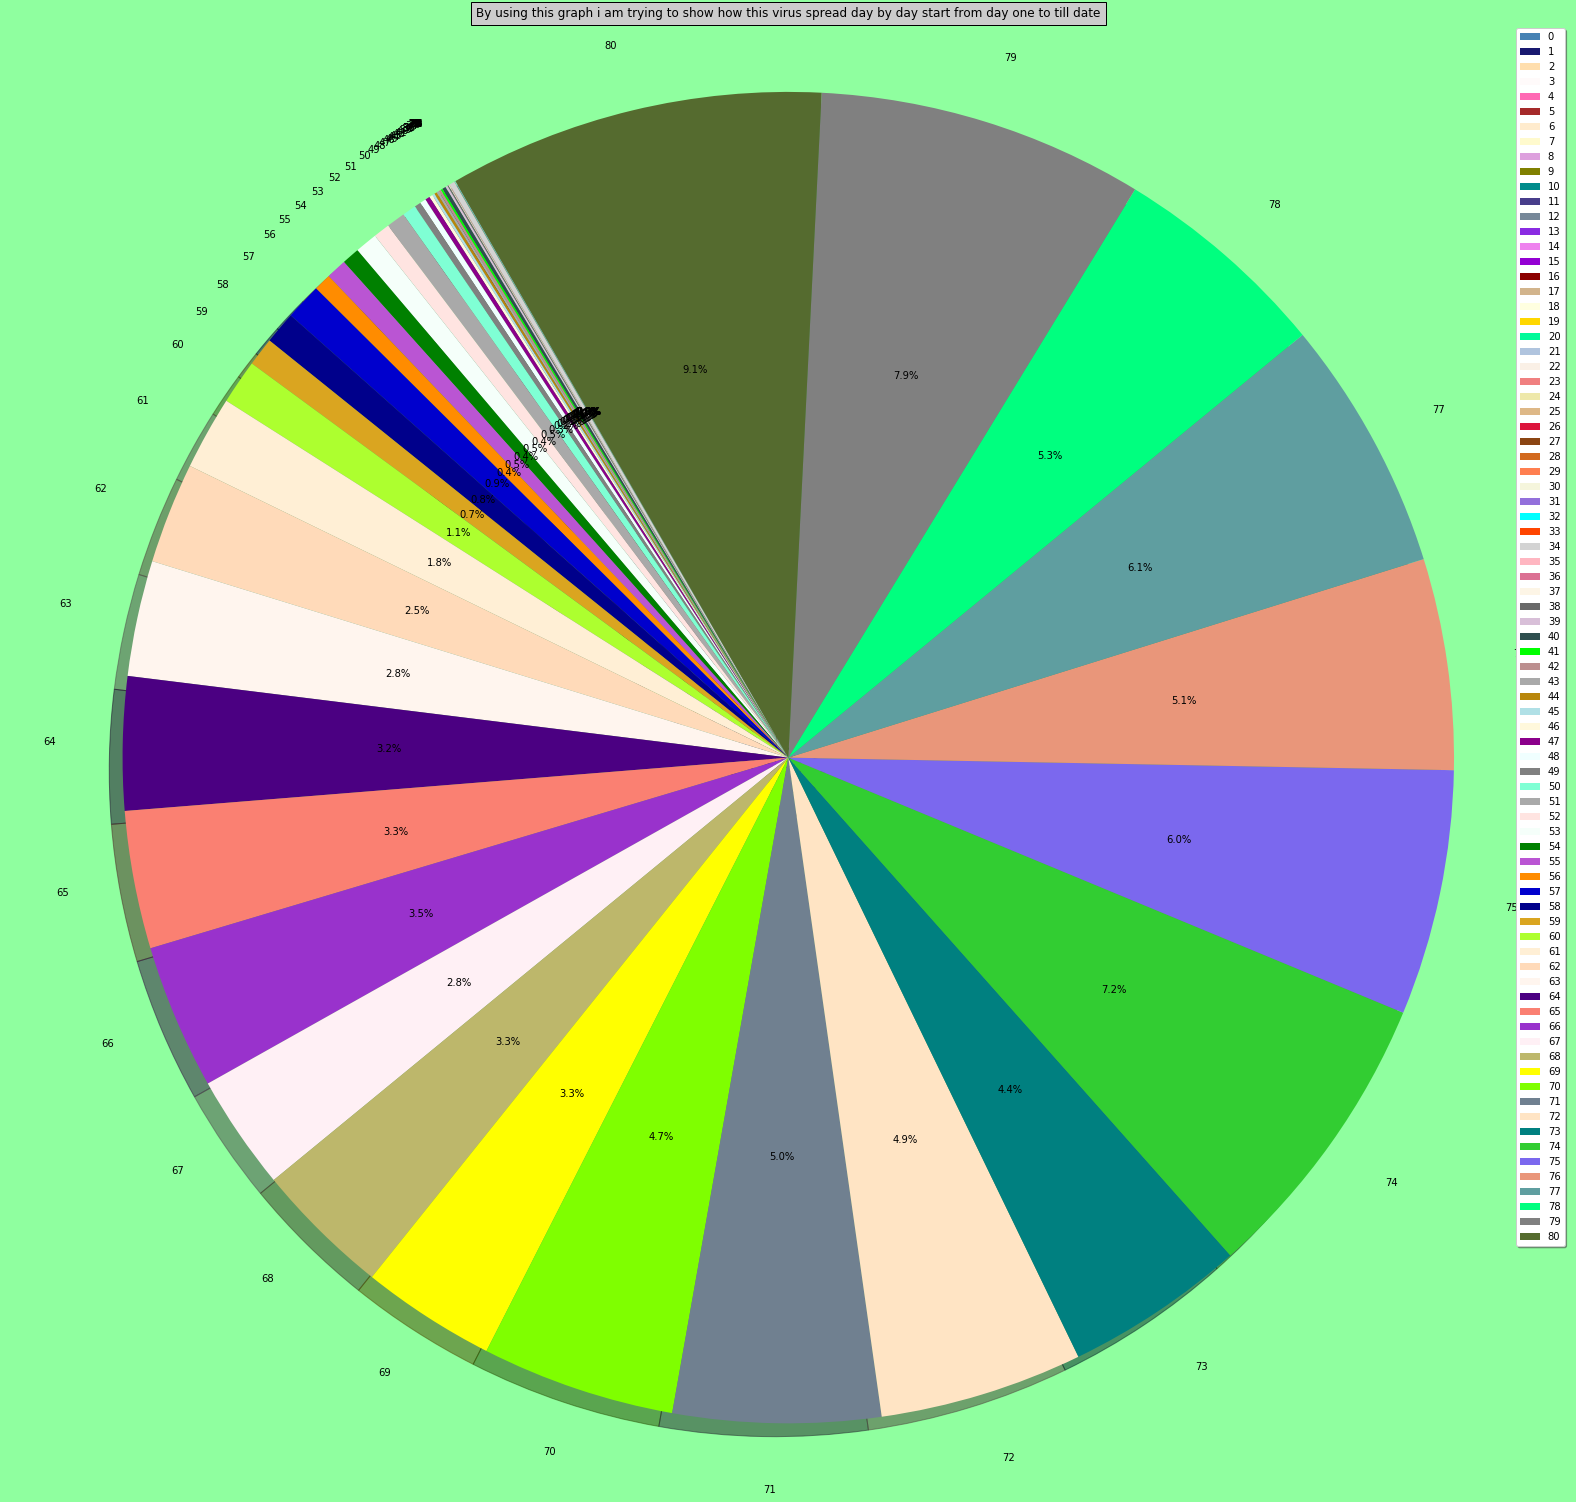

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
76,886,27,144,15 April,12370,422,1509
77,1061,26,258,16 April,13431,448,1767
78,922,38,273,17 April,14353,486,2040
79,1371,35,426,18 April,15724,521,2466
80,1580,38,388,19 April,17304,559,2854


In [36]:
import requests
import matplotlib.pyplot as plt
from random import sample
import matplotlib.colors as pltc
all_colors = [k for k,v in pltc.cnames.items()]
from pandas.io.json import json_normalize
URL = "https://api.covid19india.org/data.json"
data = requests.get(url=URL).json()
covid19_df = json_normalize(data['cases_time_series'])
T='By using this graph i am trying to show how this virus spread day by day start from day one to till date'
labels=covid19_df.index
for val in range(2):
 colors = sample(all_colors, len(labels))
fig = plt.figure(figsize=(28,27))
fig.patch.set_facecolor('xkcd:mint green')
plt.pie(covid19_df['dailyconfirmed'], labels=labels, colors=colors,autopct='%1.1f%%',shadow=True,startangle=120)
plt.legend(labels, loc="best",shadow=True)
plt.axis('equal')
plt.title(T,bbox={'facecolor':'0.8', 'pad':5})
plt.show()
covid19_df.tail()